## Observations and Insights 

In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [193]:
# Checking the number of mice.
total_mice = combined_data["Mouse ID"].nunique()
total_mice

249

In [194]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
print(duplicate_row["Mouse ID"])

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [195]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [196]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="first",inplace=False,ignore_index=False)
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [197]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_data["Mouse ID"].nunique()
total_mice

249

## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_std = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics_indv_df = pd.DataFrame({"Mean Tumor Volume": tumor_vol_mean,"Median Tumor Volume": tumor_vol_median,"Tumor Volume Variance": tumor_vol_variance,"Tumor Volume STD": tumor_vol_std,"Tumor Volume SEM": tumor_vol_sem})
summary_statistics_indv_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [199]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_table_one_function = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_table_one_function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

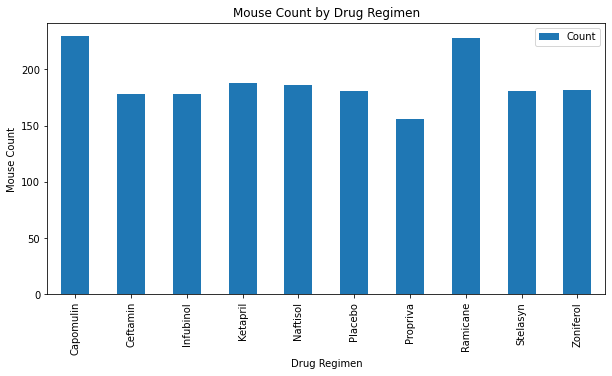

In [200]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = clean_data.groupby("Drug Regimen")["Mouse ID"].count()
# Create dataframe to be charted
mice_count_df = pd.DataFrame({"Count":mice_count})
# Create plot using pandas
mice_count_df.plot(kind="bar",figsize=(10,5))
# Add chart title and remove superfluous legend
plt.title("Mouse Count by Drug Regimen")
plt.ylabel("Mouse Count")
plt.show()

In [201]:
# Reset index
mice_count_df = mice_count_df.reset_index(drop=False)
mice_count_df

,Drug Regimen,Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


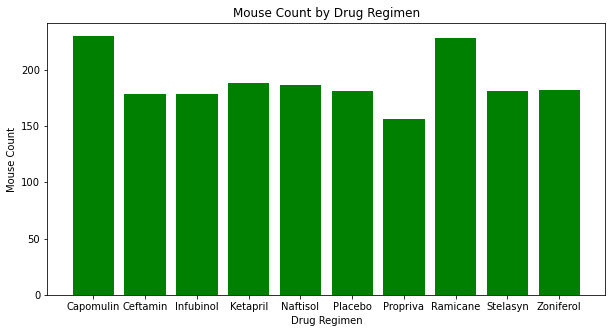

In [202]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set axes
x_axis = mice_count_df["Drug Regimen"].tolist()
y_axis = mice_count_df["Count"].tolist()
# Set larger figure size
plt.figure(figsize=(10,5))
# Plot data
plt.bar(x_axis,y_axis,color="g")
# Add plot title and labels
plt.title("Mouse Count by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.show()

Text(0.5, 1.0, 'Mice Gender Breakdown')

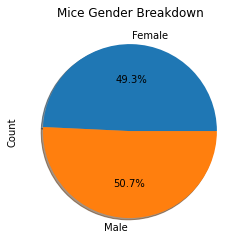

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_count = clean_data.groupby("Sex")["Mouse ID"].count()
# Create dataframe to be charted
mice_gender_count_df = pd.DataFrame({"Count":mice_gender_count})
# Create plot using pandas without legend
plot = mice_gender_count_df.plot.pie(y="Count",autopct="%1.1f%%",legend=False,shadow=True)
plt.title("Mice Gender Breakdown")

In [204]:
# Reset index
mice_gender_count_df = mice_gender_count_df.reset_index(drop=False)
mice_gender_count_df

,Sex,Count
0,Female,930
1,Male,958


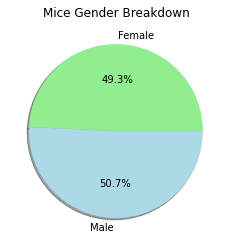

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Reset index
gender_count = mice_gender_count_df["Count"].to_list()
labels = mice_gender_count_df["Sex"].to_list()
colors = ["lightgreen","lightblue"]
plt.pie(gender_count,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True)
# Add chart title
plt.title("Mice Gender Breakdown")
plt.show()

In [206]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [207]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") | (clean_data["Drug Regimen"] == "Infubinol") | (clean_data["Drug Regimen"] == "Ceftamin")]
clean_data
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby(["Mouse ID",])["Timepoint"].max()
max_timepoint_df = pd.DataFrame({"Max Timepoint":max_timepoint}).reset_index(drop=False)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data = pd.merge(clean_data,max_timepoint_df,on="Mouse ID",how="outer")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,45
810,z581,Infubinol,Female,24,25,30,56.286750,2,45
811,z581,Infubinol,Female,24,25,35,58.628399,3,45
812,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [210]:
# Return the mice data at the max timepoint
clean_data = clean_data[clean_data["Timepoint"] == clean_data["Max Timepoint"]]
# clean_data.shape IS (100, 9) witch matches the length of my max lenght df
clean_data.shape

(100, 9)

In [211]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimens = clean_data["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
full_dataset_outliers = []

#Calculate the IQR and quantitatively determine if there are any potential outliers for the full dataset
tumor_volumes = clean_data["Tumor Volume (mm3)"]
quantiles = tumor_volume.quantile([.25,.5,.75])
Q1 = quantiles[0.25]
Q3 = quantiles[0.75]
IQR = Q3 - Q1
for t in tumor_volumes:
    if (t < Q1) | (t > Q3):
        full_dataset_outliers.append(t)
#Locate the rows which contain mice on each drug and get the tumor volumes
ramicane_data = clean_data[clean_data["Drug Regimen"] == "Ramicane"]
ramicane_tumor_vol = ramicane_data["Tumor Volume (mm3)"]

capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_tumor_vol = capomulin_data["Tumor Volume (mm3)"]

infubinol_data = clean_data[clean_data["Drug Regimen"] == "Infubinol"]
infubinol_tumor_vol = infubinol_data["Tumor Volume (mm3)"]

ceftamin_data = clean_data[clean_data["Drug Regimen"] == "Ceftamin"]    
ceftamin_tumor_vol = ceftamin_data["Tumor Volume (mm3)"]

# Determine outliers using upper and lower bounds
#Identify Q1 and Q3 and determine the IQR for each drug regimen
ramicane_quantiles = ramicane_tumor_vol.quantile([.25,.5,.75])
ramicane_Q1 = ramicane_quantiles[0.25]
ramicane_Q3 = ramicane_quantiles[0.75]
ramicane_IQR = ramicane_Q3 - ramicane_Q1
ramicane_low_bound = ramicane_Q1 - (1.5*ramicane_IQR)
ramicane_up_bound = ramicane_Q3 + (1.5*ramicane_IQR)
#Create empty list to caputure ramicane outiers
ramicane_outliers = []
for t in ramicane_tumor_vol:
    if (t < ramicane_low_bound) | (t > ramicane_up_bound):
        ramicane_outliers.append(t)

print(Drug_Regimens[0])
print(f"Q1 = {ramicane_Q1}")
print(f"Q3 = {ramicane_Q3}")
print(f"IQR = {ramicane_IQR}")
print(f"1.5 * IQR {ramicane_IQR*1.5}")
print(f"lower limit = {ramicane_low_limit}")
print(f"upper limit = {ramicane_up_limit}")
print(f"max = {ramicane_tumor_vol.max()}")
print(f"min = {ramicane_tumor_vol.min()}")
print(ramicane_tumor_vol)
print()

capomulin_quantiles = capomulin_tumor_vol.quantile([.25,.5,.75])
capomulin_Q1 = capomulin_quantiles[0.25]
capomulin_Q3 = capomulin_quantiles[0.75]
capomulin_IQR = capomulin_Q3 - capomulin_Q1
capomulin_low_bound = capomulin_Q1 - (1.5*capomulin_IQR)
capomulin_up_bound = capomulin_Q3 + (1.5*capomulin_IQR)
#Create empty list to caputure capomulin outiers
capomulin_outliers = []
for t in capomulin_tumor_vol:
    if (t < capomulin_low_bound) | (t > capomulin_up_bound):
        capomulin_outliers.append(t)

print(Drug_Regimens[1])
print(f"Q1 = {capomulin_Q1}")
print(f"Q3 = {capomulin_Q3}")
print(f"IQR = {capomulin_IQR}")
print(f"1.5 * IQR {capomulin_IQR*1.5}")
print(f"lower limit = {capomulin_low_limit}")
print(f"upper limit = {capomulin_up_limit}")
print(f"max = {capomulin_tumor_vol.max()}")
print(f"min = {capomulin_tumor_vol.min()}")
print(capomulin_tumor_vol)
print()


infubinol_quantiles = infubinol_tumor_vol.quantile([.25,.5,.75])
infubinol_Q1 = infubinol_quantiles[0.25]
infubinol_Q3 = infubinol_quantiles[0.75]
infubinol_IQR = infubinol_Q3 - infubinol_Q1
infubinol_low_bound = infubinol_Q1 - (1.5*infubinol_IQR)
infubinol_up_bound = infubinol_Q3 + (1.5*infubinol_IQR)
#Create empty list to caputure infubinol outiers
infubinol_outliers = []
for t in infubinol_tumor_vol:
    if (t < infubinol_low_bound) | (t > infubinol_up_bound):
        infubinol_outliers.append(t)

print(Drug_Regimens[2])
print(f"Q1 = {infubinol_Q1}")
print(f"Q3 = {infubinol_Q3}")
print(f"IQR = {infubinol_IQR}")
print(f"1.5 * IQR {infubinol_IQR*1.5}")
print(f"lower limit = {infubinol_low_limit}")
print(f"upper limit = {infubinol_up_limit}")
print(f"max = {infubinol_tumor_vol.max()}")
print(f"min = {infubinol_tumor_vol.min()}")
print(infubinol_tumor_vol)
print()

ceftamin_quantiles = ceftamin_tumor_vol.quantile([.25,.5,.75])
ceftamin_Q1 = ceftamin_quantiles[0.25]
ceftamin_Q3 = ceftamin_quantiles[0.75]
ceftamin_IQR = ceftamin_Q3 - ceftamin_Q1
ceftamin_low_bound = ceftamin_Q1 - (1.5*ceftamin_IQR)
ceftamin_up_bound = ceftamin_Q3 + (1.5*ceftamin_IQR)
#Create empty list to caputure ceftamin outiers
ceftamin_outliers = []
for t in ceftamin_tumor_vol:
    if (t < ceftamin_low_bound) | (t > ceftamin_up_bound):
        ceftamin_outliers.append(t)

print(Drug_Regimens[3])        
print(f"Q1 = {ceftamin_Q1}")
print(f"Q3 = {ceftamin_Q3}")
print(f"IQR = {ceftamin_IQR}")
print(f"1.5 * IQR {ceftamin_IQR*1.5}")
print(f"lower limit = {ceftamin_low_limit}")
print(f"upper limit = {ceftamin_up_limit}")
print(f"max = {ceftamin_tumor_vol.max()}")
print(f"min = {ceftamin_tumor_vol.min()}")
print(ceftamin_tumor_vol)
print()

print(ramicane_outliers)
print(capomulin_outliers)
print(infubinol_outliers)
print(ceftamin_outliers)



Ramicane
Q1 = 31.56046955
Q3 = 40.65900627
IQR = 9.098536719999998
1.5 * IQR 13.647805079999998
lower limit = 19.690480101250003
upper limit = 49.79900043124999
max = 45.22086888
min = 22.05012627
9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
262    36.561652
272    37.311236
289    38.342008
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
447    43.419381
449    43.166373
453    44.183451
Name: Tumor Volume (mm3), dtype: float64

Capomulin
Q1 = 32.37735684
Q3 = 40.1592203
IQR = 7.781863460000004
1.5 * IQR 11.672795190000006
lower limit = 20.70456164999999
upper limit = 51.83201549
max = 47.68596303
min = 23.34359787
19     23.343598
29     28.484033
39     28.430964
64     30.485985
104    31.023923
124    31.896238
134    32.377357
144    33.329098
164    34.

In [168]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Groupby and column for each drug and getting max
# merge with original dataframe  with left join

## Line and Scatter Plots

In [169]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
